<a href="https://colab.research.google.com/github/paulIruaRosero/Sistemas-dinamicos-y-control/blob/main/Transformada%20inversa%20de%20Laplace/inverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformada inversa de Laplace

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Transformada Inversa

- La transformada de Laplace también tiene una [transformada inversa](https://en.wikipedia.org/wiki/Inverse_Laplace_transform). La transformada inversa de Laplace convierte una transformada de Laplace compleja $X(s) \in \mathbb{C}$ en una señal compleja $x(t) \in \mathbb{C}$ con variable independiente real $t \in \mathbb{R}$.

- Puede demostrarse que la transformada inversa de Laplace $x(t) = \mathfrak{L}^{-1} \{ X(s) \}$ se determina de forma única.

### Fórmula Integral

Usando los resultados del análisis complejo, la transformada inversa de Laplace viene dada por la siguiente integral de línea compleja:

\begin{equation}
x(t) = \frac{1}{2 \pi j} \int_{\sigma - j \infty}^{\sigma + j \infty} X(s) \, e^{s t} \; ds
\end{equation}
donde se asume que $X(s) = \mathfrak{L} \{ x(t) \}$  es analítica en su ROC. La notación $\sigma \mp j \infty$ para los límites de integración denota una región arbitraria de integración que descansa en la ROC y para $\Im \{s\} = - \infty$ a $\Im \{s\} = + \infty$.

La ruta de integración se puede elegir paralela al eje imaginario, pero también son posibles todas las demás rutas en la ROC. Esto resulta del [teorema de integral de Cauchy](https://en.wikipedia.org/wiki/Cauchy's_integral_theorem).

### Transformadas de Laplace racionales

El cálculo de la transformada inversa de Laplace mediante la integral puede ser trabajoso.

El [teorema del residuo de Cauchy](https://en.wikipedia.org/wiki/Residue_theorem) da una solución práctica para las transformadas de Laplace $X(s) = \mathfrak{L} \{ x(t) \}$ que están dadas como funciones racionales.

Establece que el valor de una integral de línea de una función holomórfica sobre un contorno cerrado se da al resumir sus [residuos](https://en.wikipedia.org/wiki/Residue_theorem).

El residuo es el valor de la integral de línea para una ruta que encierra una singularidad. En consecuencia, la transformada inversa de Laplace de una transformada de Laplace racional se puede calcular sumando las contribuciones individuales de sus polos.

#### Procedimiento básico

Una transformada de Laplace  $X(s)$ racional puede ser escrita en términos de polinomios en el numerador y en el denominador:

\begin{equation}
X(s) = \frac{\sum_{m=0}^{M} \beta_m s^m}{\sum_{n=0}^{N} \alpha_n s^n}
\end{equation}
donde $M$, $N$ son el orden de los polinomios del numerador y del denominador y $\beta_m$, $\alpha_n$ son sus coeficientes, respectivamente.

Se asume que $\alpha_N \neq 0$ y que $M \leq N$. Si $M > N$, $X(s)$  se puede descomponer por [división polinomial](https://en.wikipedia.org/wiki/Polynomial_long_division) dentro de una suma de potencias de $s$ y una función racional cumpliendo que $M \leq N$.

Ahora, la [descomposición en fracciones parciales](https://en.wikipedia.org/wiki/Partial_fraction_decomposition) de $X(s)$ se puede escribir como:

\begin{equation}
X(s) = A_0 + \sum_{\mu = 1}^{L} \sum_{\nu = 1}^{R_\mu} \frac{A_{\mu \nu}}{(s - s_{\infty \mu})^\nu}
\end{equation}
donde $s_{\infty \mu}$ es el $\mu$-th polo único de $X(s)$, $R_\mu$ su grado y $L$ el número total de polos $\mu = \{1, \dots, L\}$.

Utilizando las transformadas conocidas de Laplace (Ver [tablas de transformadas](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/Laplace_Table.pdf)), por ejemplo:

\begin{equation}
\mathfrak{L} \{ t^n e^{-s_0 t} \epsilon(t) \} = \frac{n!}{(s + s_0)^{n+1}} \qquad \text{for } \Re \{ s \} > \Re \{ - s_0 \}
\end{equation}

y $\mathfrak{L} \{ \delta(t) \} = 1$, junto con la linealidad de la transformada de Laplace, resulta en una expresión genérica para la transformada inversa $x(t) = \mathfrak{L}^{-1} \{ X(s) \}$

\begin{equation}
x(t) = A_0 \cdot \delta(t) + \epsilon(t) \sum_{\mu = 1}^{L} e^{s_{\infty \mu} t} \sum_{\nu = 1}^{R_\mu} \frac{A_{\mu \nu} \, t^{\mu - 1}}{(\nu -1)!}
\end{equation}

Sin embargo, se deben calcular los coeficientes $A_0$ y $A_{\mu \nu}$ de la descomposición en fracciones parciales.

El coeficiente constante $A_0$ está dado por:

\begin{equation}
A_0 = \lim_{s \to \infty} X(s)
\end{equation}

Para un polo $s_{\infty \mu}$ con grado $R_\mu = 1$, el coeficiente $A_{\mu 1}$ es:

\begin{equation}
A_{\mu 1} = \lim_{s \to s_{\infty \mu}} \left( X(s) \cdot (s - s_{\infty \mu}) \right)
\end{equation}

Para un polo $s_{\infty \mu}$ de grado $R_\mu > 1$, los coeficientes $A_{\mu \nu}$ son:

\begin{equation}
A_{\mu \nu} = \frac{1}{(R_\mu - \nu)!} \lim_{s \to s_{\infty \mu}} \frac{d^{R_\mu - \nu}}{d s^{R_\mu - \nu}} \left( X(s) \cdot (s - s_{\infty \mu})^{R_\mu} \right)
\end{equation}

#### Clasificación de polos

- El anterior procedimiento permite calcular la transformada inversa de Laplace $x(t) = \mathfrak{L}^{-1} \{ X(s) \}$ de una transfromada de Laplace racional $X(s)$ de manera mecánica.

- Es muy adecuado para una realización algorítmica. Sin embargo, para el cálculo manual puede ser más eficiente clasificar los polos con respecto a su ubicación en el plano $ s $ y sus simetrías.

- La clasificación se puede usar para formular una descomposición de fracción parcial modificada que limita la necesidad de una posterior simplificación algebraica de la transformada de Laplace inversa.

- Tres clases de polos son comunmente considerados:

| Tipo | Diagrama de Polos y Ceros | $X(s)$ | $x(t) = \mathfrak{L}^{-1} \{ X(s) \} \qquad \qquad$ |
|---|:---:|:---:|:---:|
| Un polo complejo | ![Un polo](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/single_pole.png?raw=1) | $\frac{n!}{(s + s_0)^{n+1}}$ | $t^n e^{-s_0 t} \epsilon(t)$ |
| Polos imaginarios conjugados| ![Imaginarios conjugados](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/conjugated_imaginary_poles.png?raw=1) | $\frac{A s + B}{s^2 + \omega_0^2}$ | $\begin{cases} \sin(\omega_0 t) \epsilon(t) \\ \cos(\omega_0 t) \epsilon(t) \end{cases}$ |
| Polos complejos conjugados| ![Complejos conjugados](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/conjugated_complex_poles.png?raw=1) | $\frac{A s + B}{(s + \sigma_0)^2 + \omega_0^2}$ | $\begin{cases} e^{-\sigma_0 t} \sin(\omega_0 t) \epsilon(t) \\ e^{-\sigma_0 t} \cos(\omega_0 t) \epsilon(t) \end{cases}$ |

Donde $s_0 \in \mathbb{C}$ y $\omega_0, \sigma_0 \in \mathbb{R}$.

- Los coeficientes de expansión $A, B \in \mathbb{R}$ se pueden derivar por comparación coeficientes. Si $x(t)$ contiene un seno o un coseno, depende del coeficiente $A$.

- Si $A \neq 0$ luego $x(t)$ contiene un coseno.

#### Transformada inversa para una respuesta al escalón del circuito T con puente

Determine la transformada inversa $v_1(t) = \mathfrak{L}^{-1} \{ V_1(s) \}$ de:

# vamos a calcular la salida de $V_1(t)$ usando sympy

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t = sym.symbols('t', real=True)

#vamos a definir los parámetros del circuito T con puente
R1 = 1e3
R2 = R1
C1 = 1e-6
C2 = C1

#vamos a definir la entrada a un escalón unitario de 10 v al circuito
Vi_s = 10/s

#definimos la función de transferencia del sistema
H1_s = ((1/(C2*R2*s) + 1 + R1/R2)/((1 + R1/R2 + R1*C1*s)*(1/(C2*R2*s) + 1)-R1/(C2*R2*s*R2)))
H1_s


                  1000.0             
            2.0 + ──────             
                    s                
─────────────────────────────────────
⎛    1000.0⎞                   1000.0
⎜1 + ──────⎟⋅(0.001⋅s + 2.0) - ──────
⎝      s   ⎠                     s   

vamos a mostrar la salida $V_1(s)$ en el dominio de Laplace

In [ ]:
V1_s = H1_s * Vi_s
V1_s

               ⎛      1000.0⎞            
            10⋅⎜2.0 + ──────⎟            
               ⎝        s   ⎠            
─────────────────────────────────────────
  ⎛⎛    1000.0⎞                   1000.0⎞
s⋅⎜⎜1 + ──────⎟⋅(0.001⋅s + 2.0) - ──────⎟
  ⎝⎝      s   ⎠                     s   ⎠

Vamos a calcular la transformada inversa de Laplace de $V_1(s)$ para mirar la respuesta en el tiempo

In [ ]:
V_1 = sym.inverse_laplace_transform(V1_s, s, t) #trasformada inversa
V_1

   ⎛                   -1500.0⋅t                                 -1500.0⋅t     ↪
10⋅⎝0.447213595499958⋅ℯ         ⋅sinh(1118.03398874989⋅t) - 1.0⋅ℯ         ⋅cos ↪

↪                      ⎞                 
↪ h(1118.03398874989⋅t)⎠⋅θ(t) + 10.0⋅θ(t)

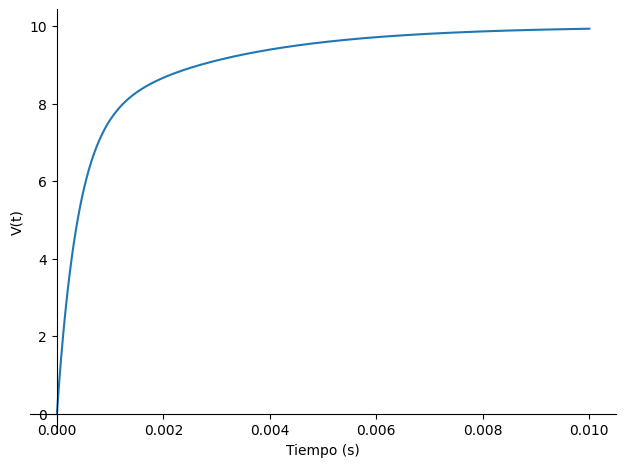

In [ ]:
sym.plot(V_1, (t, 0, 0.01), grid=True, xlabel='Tiempo (s)', ylabel='V(t)')

# vamos a calcular la salida $v_2(t)$ usando sympy

In [ ]:
#definimos la función de transferencia del sistema
H2_s = ((1/(C2*R2*s) + 1 + R1/R2 + R1*C1*s)/((1 + R1/R2 + R1*C1*s)*(1/(C2*R2*s) + 1)-R1/(C2*R2*s*R2)))
H2_s

                       1000.0        
       0.001⋅s + 2.0 + ──────        
                         s           
─────────────────────────────────────
⎛    1000.0⎞                   1000.0
⎜1 + ──────⎟⋅(0.001⋅s + 2.0) - ──────
⎝      s   ⎠                     s   

In [ ]:
V2_s = H2_s * Vi_s
V2_s

          ⎛                1000.0⎞       
       10⋅⎜0.001⋅s + 2.0 + ──────⎟       
          ⎝                  s   ⎠       
─────────────────────────────────────────
  ⎛⎛    1000.0⎞                   1000.0⎞
s⋅⎜⎜1 + ──────⎟⋅(0.001⋅s + 2.0) - ──────⎟
  ⎝⎝      s   ⎠                     s   ⎠

In [ ]:
V_2 = sym.inverse_laplace_transform(V2_s, s, t) #trasformada inversa
V_2

   ⎛                     -1500.0⋅t                                             ↪
10⋅⎝- 0.894427190999917⋅ℯ         ⋅sinh(1118.03398874989⋅t) + 4.44089209850062 ↪

↪       -1500.0⋅t                         ⎞                 
↪ e-16⋅ℯ         ⋅cosh(1118.03398874989⋅t)⎠⋅θ(t) + 10.0⋅θ(t)

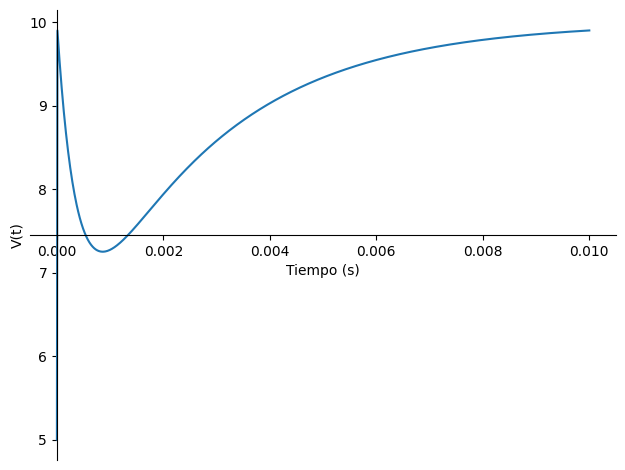

In [ ]:
sym.plot(V_2, (t, 0, 0.01), grid=True, xlabel='Tiempo (s)', ylabel='V(t)')

In [ ]:
import sympy as sp

# Definimos la variable
x = sp.symbols('x')

# Pedimos el valor de k al usuario
k = float(input("Ingrese el valor de k: "))

# Definimos la ecuación
ecuacion = x*(x+1) + k*(x+2)*(x+3)

# Resolvemos la ecuación
raices = sp.solve(ecuacion, x)

# Mostramos resultados
print("Las raíces de la ecuación son:")
for r in raices:
    print(r.evalf())




Ingrese el valor de k: 1000000
Las raíces de la ecuación son:
-2.99999399999400
-2.00000200001000


In [36]:
import sympy as sp

# Definimos la variable
x = sp.symbols('x')

# Pedimos el valor de k al usuario
k = float(input("Ingrese el valor de k: "))

# Definimos la ecuación
ecuacion = x*(x+1)*(x+2)*(x+4) + k*(x+3)

# Resolvemos la ecuación
raices = sp.solve(ecuacion, x)

# Mostramos resultados
print("Las raíces de la ecuación son:")
for r in raices:
    print(r.evalf())

Ingrese el valor de k: 9.646
Las raíces de la ecuación son:
-4.37796577954034
-2.62205897878949
1.23791649133105e-5 - 1.58773071636586*I
1.23791649133105e-5 + 1.58773071636586*I


In [5]:
import numpy as np

def calcular_raices():
    print("Cálculo de raíces de un polinomio")
    print("Ingresa los coeficientes del polinomio en orden descendente de grado.")
    print("Ejemplo: Para x^3 - 6x^2 + 11x - 6, escribe: 1 -6 11 -6")

    # Leer los coeficientes como lista de float
    coeficientes = list(map(float, input("Coeficientes: ").split()))

    # Crear el polinomio y hallar las raíces
    raices = np.roots(coeficientes)

    print("\nLas raíces del polinomio son:")
    for i, r in enumerate(raices, start=1):
        print(f"Raíz {i}: {r}")

# Ejecutar la función
if __name__ == "__main__":
    calcular_raices()


Cálculo de raíces de un polinomio
Ingresa los coeficientes del polinomio en orden descendente de grado.
Ejemplo: Para x^3 - 6x^2 + 11x - 6, escribe: 1 -6 11 -6
Coeficientes: 3 26 77 84 24

Las raíces del polinomio son:
Raíz 1: (-3.3110133195112468+0.6812448722029889j)
Raíz 2: (-3.3110133195112468-0.6812448722029889j)
Raíz 3: (-1.6097177088717425+0j)
Raíz 4: (-0.4349223187724237+0j)


In [7]:
import sympy as sp

def derivar_y_simplificar():
    print("Cálculo y simplificación de la derivada de una función")
    print("Ejemplo de entrada: sin(x)*x**2 + exp(x)")

    # Definir la variable simbólica
    x = sp.symbols('x')

    # Leer la función
    funcion_str = input("Ingresa la función en términos de x: ")

    # Convertir la cadena a expresión simbólica
    funcion = sp.sympify(funcion_str)

    # Calcular la derivada
    derivada = sp.diff(funcion, x)

    # Simplificar la derivada
    derivada_simplificada = sp.simplify(derivada)

    print(f"\nLa función ingresada es: {funcion}")
    print(f"La derivada sin simplificar es: {derivada}")
    print(f"La derivada simplificada es: {derivada_simplificada}")

# Ejecutar la función
if __name__ == "__main__":
    derivar_y_simplificar()


Cálculo y simplificación de la derivada de una función
Ejemplo de entrada: sin(x)*x**2 + exp(x)
Ingresa la función en términos de x: (x*(x+1)*(x+2)*(x+4))/(x+3)

La función ingresada es: x*(x + 1)*(x + 2)*(x + 4)/(x + 3)
La derivada sin simplificar es: x*(x + 1)*(x + 2)/(x + 3) - x*(x + 1)*(x + 2)*(x + 4)/(x + 3)**2 + x*(x + 1)*(x + 4)/(x + 3) + x*(x + 2)*(x + 4)/(x + 3) + (x + 1)*(x + 2)*(x + 4)/(x + 3)
La derivada simplificada es: (3*x**4 + 26*x**3 + 77*x**2 + 84*x + 24)/(x**2 + 6*x + 9)


In [38]:
pip install control


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 11.3 MB/s eta 0:00:00


Gráfico del Lugar Geométrico de las Raíces (LGR)
Ejemplo: Numerador = [1], Denominador = [1, 3, 2]
Coeficientes del numerador (separados por espacio): 1 3
Coeficientes del denominador (separados por espacio): 1 7 14 8 0


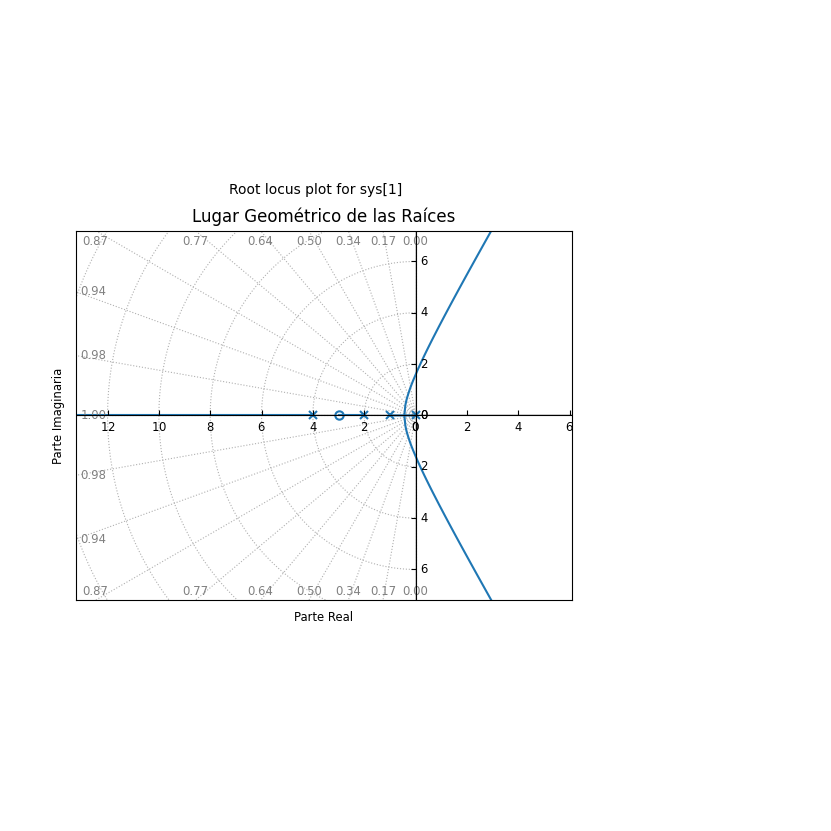

In [41]:
import matplotlib.pyplot as plt
import control

def graficar_lgr():
    print("Gráfico del Lugar Geométrico de las Raíces (LGR)")
    print("Ejemplo: Numerador = [1], Denominador = [1, 3, 2]")

    # Ingreso de coeficientes
    num = list(map(float, input("Coeficientes del numerador (separados por espacio): ").split()))
    den = list(map(float, input("Coeficientes del denominador (separados por espacio): ").split()))

    # Crear función de transferencia
    sistema = control.TransferFunction(num, den)

    # Graficar el LGR
    plt.figure()
    control.root_locus(sistema)
    plt.title("Lugar Geométrico de las Raíces")
    plt.xlabel("Parte Real")
    plt.ylabel("Parte Imaginaria")
    plt.grid(True)
    plt.show()

# Ejecutar
if __name__ == "__main__":
    graficar_lgr()